In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path= "../data/"
list_col = ['HES US Equity', 'NEM US Equity', 'INTC US Equity', 'IFF US Equity',
       'MOS US Equity', 'EXC US Equity', 'KMB US Equity', 'JNJ US Equity',
       'BAX US Equity', 'F US Equity', 'COP US Equity',
       'WFC US Equity', 'WY US Equity', 'TGT US Equity', 'MMM US Equity',
       'CMI US Equity', 'HAS US Equity', 'DUK US Equity',
       'EMN US Equity', 'BK US Equity', 'UFS US Equity', 'ECL US Equity',
       'SLB US Equity', 'UPS US Equity', 'T US Equity', 'NSC US Equity',
       'PPL US Equity', 'MO US Equity', 'JLL US Equity', 'C US Equity',
       'ABT US Equity', 'AMD US Equity', 'CVX US Equity', 'CMA US Equity',
       'DTE US Equity', 'HSY US Equity', 'KIM US Equity', 'NBL US Equity',
       'IBM US Equity', 'WELL US Equity', 'IR US Equity', 'BKR US Equity',
       'WEC US Equity', 'OXY US Equity', 'WMB US Equity', 'UNP US Equity',
       'WM US Equity', 'CCL US Equity']

In [3]:
returns = pd.read_csv(file_path+"return.csv")[['Date1']+list_col]
returns.rename(columns={returns.columns[0]: "Date" }, inplace = True)
CURRENT_EV_TO_T12M_EBITDA = pd.read_csv(file_path+"CURRENT_EV_TO_T12M_EBITDA.csv")[['Date']+list_col]
DIVIDEND_INDICATED_YIELD= pd.read_csv(file_path+"DIVIDEND_INDICATED_YIELD.csv")[['Date']+list_col]
EBITDA_TO_INTEREST_EXPN = pd.read_csv(file_path+"EBITDA_TO_INTEREST_EXPN.csv")[['Date']+list_col]
EBITDA_TO_REVENUE = pd.read_csv(file_path+"EBITDA_TO_REVENUE.csv")[['Date']+list_col]
EPS_GROWTH = pd.read_csv(file_path+"EPS_GROWTH.csv")[['Date']+list_col]
EQY_DVD_YLD_IND = pd.read_csv(file_path+"EQY_DVD_YLD_IND.csv")[['Date']+list_col]
PE_RATIO = pd.read_csv(file_path+"PE_RATIO.csv")[['Date']+list_col]
TOT_DEBT_TO_EBITDA = pd.read_csv(file_path+"TOT_DEBT_TO_EBITDA.csv")[['Date']+list_col]

In [4]:
# Not taking EPS growth because if NaN values 
list_df_str = [
            'CURRENT_EV_TO_T12M_EBITDA','DIVIDEND_INDICATED_YIELD','EBITDA_TO_INTEREST_EXPN',
            'EBITDA_TO_REVENUE','EQY_DVD_YLD_IND','PE_RATIO','TOT_DEBT_TO_EBITDA'
          ]
list_df = [
            CURRENT_EV_TO_T12M_EBITDA,DIVIDEND_INDICATED_YIELD,EBITDA_TO_INTEREST_EXPN,
            EBITDA_TO_REVENUE,EQY_DVD_YLD_IND,PE_RATIO,TOT_DEBT_TO_EBITDA
          ]
len(list_df)

7

In [5]:
col = 'HES US Equity'
df = returns[["Date",str(col)]].copy()
df.Date = pd.to_datetime(df.Date)
df.Date = df.Date.dt.strftime('%m/%Y')
df_final = df.copy()

for res,res_str in zip(list_df,list_df_str):
    
    df2 = res[["Date",str(col)]].copy()
    df2.Date = pd.to_datetime(df2.Date)
    df2.rename(columns={str(col): str(res_str) }, inplace = True)
    df2.Date = df2.Date + pd.DateOffset(months=1)
    df2.Date = df2.Date.dt.strftime('%m/%Y')
    df_final = pd.merge(df_final,df2,on='Date', how='outer').fillna(method='ffill').dropna()

df_final.Date = pd.to_datetime(df_final.Date)
print(df_final.shape)
df_final.head(2)

(118, 9)


,Date,HES US Equity,CURRENT_EV_TO_T12M_EBITDA,DIVIDEND_INDICATED_YIELD,EBITDA_TO_INTEREST_EXPN,EBITDA_TO_REVENUE,EQY_DVD_YLD_IND,PE_RATIO,TOT_DEBT_TO_EBITDA
0,2010-01-01,1.747707,5.5099,0.6612,16.5495,17.3542,0.6612,40.8164,1.0684
1,2010-02-01,6.552083,5.5099,0.6612,16.5495,17.3542,0.6612,40.8164,1.0684


In [6]:
df_final.tail(2)

,Date,HES US Equity,CURRENT_EV_TO_T12M_EBITDA,DIVIDEND_INDICATED_YIELD,EBITDA_TO_INTEREST_EXPN,EBITDA_TO_REVENUE,EQY_DVD_YLD_IND,PE_RATIO,TOT_DEBT_TO_EBITDA
116,2019-09-01,8.713624,7.8839,1.5731,8.7216,50.9639,1.5731,3055.7097,2.2353
117,2019-10-01,-5.566540,7.8176,1.6534,8.3111,47.3418,1.6534,3055.7097,2.2434


In [7]:
df_final.isnull().values.any()

False

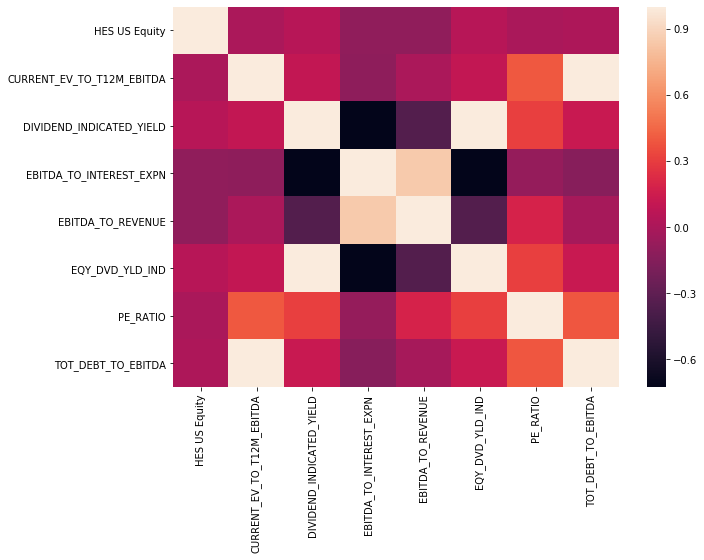

In [8]:
fig = plt.figure(figsize=(10, 7))
sns.heatmap(df_final.iloc[:,1:].corr())

In [9]:
# Creation d'une liste avec les modeles qui vont être appliqués
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


models = []
models.append(XGBRegressor(silent=True))
models.append(GradientBoostingRegressor(verbose = 0))
models.append(RandomForestRegressor(verbose=0))
models.append(AdaBoostRegressor())
models.append(CatBoostRegressor(silent=True))
models.append(LGBMRegressor(silent=True))

In [10]:
y = df_final[['HES US Equity']].copy()
date = df_final['Date'].to_list()
X = df_final.drop(['Date','HES US Equity'],axis=1).copy()
sc = StandardScaler()
X[list_df_str] = sc.fit_transform(X[list_df_str])
X.head()

,CURRENT_EV_TO_T12M_EBITDA,DIVIDEND_INDICATED_YIELD,EBITDA_TO_INTEREST_EXPN,EBITDA_TO_REVENUE,EQY_DVD_YLD_IND,PE_RATIO,TOT_DEBT_TO_EBITDA
0,-0.232063,-1.085453,0.689966,-0.116175,-1.085453,-0.394210,-0.256483
1,-0.232063,-1.085453,0.689966,-0.116175,-1.085453,-0.394210,-0.256483
2,-0.232063,-1.085453,0.689966,-0.116175,-1.085453,-0.394210,-0.256483
3,-0.234233,-1.122623,0.956437,-0.110171,-1.122623,-0.416508,-0.258629
4,-0.234233,-1.122623,0.956437,-0.110171,-1.122623,-0.416508,-0.258629


In [17]:
len(X)

118

In [24]:
i = 0 
results = []
date_of_pred = []
# Normally is 60 = 5 years
# It works better when is 118 (full length data)
window_size = 118
step_size = 1
backtest_size = 1
names = []

for m in models:
    m = str(m).split('(')[0]
    names.append(m)

while i + window_size <= X.shape[0]:
    
    print("Current index"+str(i))
    
    # We take the first 60 data points
    sample_X = X.iloc[i:i+window_size,:].copy()
    sample_Y = y.iloc[i:i+window_size].copy()
    # We train it in the first 59 points
    X_train = sample_X.iloc[:-backtest_size,:].copy()
    Y_train = sample_Y.iloc[:-backtest_size].copy()
    # We test for the following month (so we try to predict only one month)
    X_test = sample_X.iloc[-backtest_size:,:].copy()
    Y_test = sample_Y.iloc[-backtest_size:].copy()
    date_of_pred.append(str(date[X_test.index[-1]]))
    
    """
    In case we want to calculate more than the next month, this will take the first 
    and the last date of the X_test
    date_of_pred.append(str(date[X_test.index[0]]) + '-' + str(date[X_test.index[-1]]))
    """
    x_train_values = X_train.values
    y_train_values = Y_train.values
    y_train_values = Y_test.values
    
    modelscore = []
    
    for model in models:
        
        model.fit(X_train,Y_train.values.ravel())
        y_pred = model.predict(X_test)
        # Mean absolute error
        score = metrics.mean_absolute_error(Y_test.values.ravel(), y_pred)
        modelscore.append(score)
    
    results.append(modelscore)
    
    i+=step_size

Current index0


In [25]:
results_summary = pd.DataFrame(results,columns = names)
results_summary.insert(0,"period_of_pred",date_of_pred)
results_summary

,period_of_pred,XGBRegressor,GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,<catboost.core.CatBoostRegressor object at 0x000002CD3D6D2EB8>,LGBMRegressor
0,2019-10-01 00:00:00,6.608099,6.492964,6.48616,7.246356,6.699836,5.545639


In [26]:
results_summary.mean()

XGBRegressor                                                      6.608099
GradientBoostingRegressor                                         6.492964
RandomForestRegressor                                             6.486160
AdaBoostRegressor                                                 7.246356
<catboost.core.CatBoostRegressor object at 0x000002CD3D6D2EB8>    6.699836
LGBMRegressor                                                     5.545639
dtype: float64